In [1]:
import sklearn.datasets as skd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score 

In [ ]:
# importing all the document of all classes in 'news' variable
news = skd.load_files('20newsgroups', encoding = 'ISO-8859-1')

In [5]:
dir(news)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [6]:
# printing all classes in the 20 newsgroup dataset
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
# splitting the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(news.data, news.target, random_state = 0)

In [8]:
# printing the length of x_train, x_test, y_train, y_test
print("x_train :", len(x_train))
print("x_test :", len(x_test))
print("y_train :", len(y_train))
print("y_test :", len(y_test))

x_train : 14997
x_test : 5000
y_train : 14997
y_test : 5000


In [9]:
# making vocabulary of words present in x_train along with their respective counts
vocabulary = {}
for x in x_train:
    splitted_x = "".join((char.lower() if char.isalpha() else " ") for char in x).split()
    #print(splitted_x)
    for s in splitted_x:
        if s in vocabulary:
            vocabulary[s] += 1
        else:
            vocabulary[s] = 1
len(vocabulary)

102331

In [10]:
# stopwords that often occur in every documnet and are thus not useful in predictions
stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'arent', 'as', 'at',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 
 'can', 'cant', 'cannot', 'could', 'couldnt', 'did', 'didnt', 'do', 'does', 'doesnt', 'doing', 'dont', 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 'had', 'hadnt', 'has', 'hasnt', 'have', 'havent', 'having', 'he', 'hed', 'hell',
 'hes', 'her', 'here', 'heres', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'hows',
 'i', 'id', 'ill', 'im', 'ive', 'if', 'in', 'into', 'is', 'isnt', 'it', 'its', 'its', 'itself',
 'lets', 'me', 'more', 'most', 'mustnt', 'my', 'myself',
 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', 'shant', 'she', 'shed', 'shell', 'shes', 'should', 'shouldnt', 'so', 'some', 'such', 
 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'theres', 'these', 'they', 'theyd', 
 'theyll', 'theyre', 'theyve', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
 'was', 'wasnt', 'we', 'wed', 'well', 'weve', 'were', 'werent', 'what', 'whats', 'when', 'whens', 'where',
 'wheres', 'which', 'while', 'who', 'whos', 'whom', 'why', 'whys','will', 'with', 'wont', 'would', 'wouldnt', 
 'you', 'youd', 'youll', 'youre', 'youve', 'your', 'yours', 'yourself', 'yourselves', 
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd',
 '4th', '5th', '6th', '7th', '8th', '9th', '10th']
len(stopwords)

195

In [11]:
# removing stop words from vocabulary
for s_word in stopwords:
    if s_word in vocabulary:
        del vocabulary[s_word]

In [12]:
# splitting the vocabulary into a list of words and frequencies
words = []
freq = []
for i in vocabulary:
    words.append(i)
    freq.append(vocabulary[i])

In [13]:
# sorting the words and frequencies simultaneously on the basis of decreasing order of frequencies
freq, words = [list(t) for t in zip(*sorted((zip(freq, words)), reverse = True))]

In [14]:
# x_axis represents the number of words
# y_axis represents the frequency of words
x_axis = []
y_axis = []
for f in sorted(np.unique(freq), reverse = True):
    y_axis.append(f)
    x_axis.append(freq.count(f))

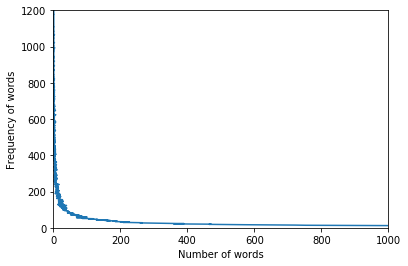

In [15]:
plt.axis([0, 1000, 0, 1200])
plt.xlabel('Number of words')
plt.ylabel('Frequency of words')
plt.plot(x_axis, y_axis)
plt.show()

In [16]:
# n represents the number of words to be used as features
n = 1000
features = words[0: n]
print(features)

['edu', 'ax', 'cmu', 'com', 'cs', 's', 'apr', 't', 'news', 'srv', 'cantaloupe', 'net', 'm', 'message', 'subject', 'lines', 'date', 'c', 'newsgroups', 'path', 'organization', 'x', 're', 'state', 'gmt', 'd', 'ohio', 'writes', 'r', 'article', 'comp', 'references', 'b', 'talk', 'misc', 'u', 'ca', 'w', 'f', 'q', 'g', 'ans', 'p', 'sender', 'howland', 'reston', 'v', 'don', 'e', 'people', 'like', 'university', 'just', 'posting', 'nntp', 'cc', 'o', 'mps', 'know', 'may', 'host', 'sci', 'get', 'zaphod', 'usenet', 'think', 'alt', 'n', 'politics', 'k', 'windows', 'l', 'also', 'time', 'eng', 'harvard', 'rutgers', 'new', 'use', 'near', 'rec', 'us', 'good', 'system', 'sei', 'crabapple', 'h', 'noc', 'j', 'max', 'xref', 'das', 'soc', 'now', 'cis', 'even', 'see', 'z', 'god', 'europa', 'gtefsd', 'ece', 'fs', 'uk', 'uunet', 'world', 'religion', 'way', 'make', 'org', 'say', 'gov', 'much', 'many', 'christian', 'first', 'right', 'de', 've', 'rochester', 'distribution', 'ac', 'hp', 'mail', 'club', 'sun', 'spac

# inbuilt sklearn.naive_bayes.MultinomialNB algorithm

In [17]:
# making a two - dimensional array for x_train as x_new_train having the
#frequency of each word in the feature set for all x_train data
x_new_train = []
for x in x_train:
    splitted_x = "".join((char.lower() if char.isalpha() else " ") for char in x).split()
    x_row = []
    for f in features:
        if f in splitted_x:
            x_row.append(splitted_x.count(f))
        else:
            x_row.append(0)
    x_new_train.append(x_row)
len(x_new_train)

14997

In [18]:
# making a two - dimensional array for x_test as x_new_test having the
#frequency of each word in the feature set for all x_test data
x_new_test = []
for x in x_test:
    splitted_x = "".join((char.lower() if char.isalpha() else " ") for char in x).split()
    x_row = []
    for f in features:
        if f in splitted_x:
            x_row.append(splitted_x.count(f))
        else:
            x_row.append(0)
    x_new_test.append(x_row)
len(x_new_test)

5000

In [21]:
# fitting the training data and predicting the testing data using inbuilt MultinomialNB classifier
clf = MultinomialNB()
clf.fit(x_new_train, y_train)
print("Score:  ",clf.score(x_new_test, y_test))
y_pred = clf.predict(x_new_test)
cm = confusion_matrix(y_test, y_pred)
print()
print(cm)

Score:   0.8108

[[189   0   0   1   0   0   1   0   2   1   1   1   0   1   2   1   1   2
    0  46]
 [  0 169   2  18   9  11  12   4   3   1   0   0   9   2   1   0   1   0
    0   0]
 [  0  31   5 116  11  64   7   0   0   0   0   1   5   1   0   0   0   0
    0   0]
 [  0   4   0 227  14   3   1   1   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   2   0  28 217   0   5   0   0   0   0   0   4   1   0   0   0   0
    0   0]
 [  0  30   1  11   5 204   6   0   0   0   0   2   4   0   2   0   0   1
    0   0]
 [  0   1   0   6   2   0 210   2   0   0   1   0   5   1   0   0   0   0
    1   0]
 [  0   0   0   1   0   0   8 207  10   0   0   0   1   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   8   4 254   1   1   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   2   4 224  13   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   2   1   5   9 229   0   0   0   1   0   0   0
    0   0]
 [  0   4   0   0   0   0   0   0   0   0   0 23

# My Implementation of Multinomial Naive Bayes Algorithm

In [23]:
# fit function to create a dictionary of training data
def fit(x_train, y_train):
    result = {}
    result['total_data'] = len(y_train)
    classes = set(y_train)
    for current_class in classes:
        result[current_class] = {}
        current_class_rows = (y_train == current_class)
        x_train_current = x_train[current_class_rows]
        y_train_current = y_train[current_class_rows]
        result[current_class]['total_count'] = len(y_train_current)
        result[current_class]['total_words'] = x_train_current.sum()
        num_features = len(features)
        for n in range(num_features):
            result[current_class][features[n]] = x_train_current[:, n].sum()
    return result

In [24]:
# probability function for calculating the log probability of each document in x_test for a particular class
def probability(dictionary, x, current_class):
    output = np.log(dictionary[current_class]['total_count']) - np.log(dictionary['total_data'])
    num_features = len(x)
    for n in range(num_features):
        num = dictionary[current_class][x[n]] + 1
        den = dictionary[current_class]['total_words'] + len(features)
        output += np.log(num) - np.log(den)
    return output

In [25]:
# predictSinglePoint function for predicting the class for each document in x_test with all classes
# and returning the best class for that document 
def predictSinglePoint(dictionary, x):
    classes = dictionary.keys()
    best_p = -1000000000
    best_class = -1
    for current_class in classes:
        if current_class == 'total_data':
            continue
        p_current_class = probability(dictionary, x, current_class)
        if p_current_class > best_p:
            best_p = p_current_class
            best_class = current_class
    return best_class

In [26]:
# predict function for predicting classes for all document in x_test
def predict(dictionary, x_test):
    y_pred = []
    for x in x_test:
        x_class = predictSinglePoint(dictionary, x)
        y_pred.append(x_class)
    return y_pred

In [27]:
# converting the x_new_train into numpy array and 
# calling the fit function that will return the required dictionary
x_train = np.array(x_new_train)
dictionary = fit(x_train, y_train)

In [28]:
# making a two-dimensional array of words in each documnet in x_test that are also in feature set
x_new_test = []
for x in x_test:
    splitted_x = "".join((char.lower() if char.isalpha() else " ") for char in x).split()
    x_row = []
    for f in features:
        if f in splitted_x and f not in x_row:
            x_row.append(f)
    x_new_test.append(x_row)

In [29]:
# calling the predict function that will predict classes for each document in x_new_test 
y_pred = predict(dictionary, x_new_test)

In [30]:
accuracy_score(y_test, y_pred)

0.828

In [31]:
cm = confusion_matrix(y_test, y_pred)
print()
print(cm)


[[203   0   0   0   0   0   1   0   3   0   0   1   0   2   0   1   0   2
    1  35]
 [  0 179   0  21   7   5   7   1   2   0   0   0  19   1   0   0   0   0
    0   0]
 [  0  41   3 133   7  30   5   0   0   0   0   2  17   0   0   0   0   0
    3   0]
 [  0   2   0 240   6   0   1   0   0   0   0   0   2   1   0   0   0   0
    0   0]
 [  0   0   0  19 235   0   2   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  47   0  23   8 171   5   0   1   0   0   1   8   2   0   0   0   0
    0   0]
 [  0   2   0   6   2   0 208   4   1   0   0   0   3   1   1   0   0   0
    1   0]
 [  0   0   0   0   0   0   6 215   4   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   5   4 259   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   1 232  11   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   0   8 237   0   0   0   1   0   0   0
    0   0]
 [  0   4   0   0   0   0   0   0   0   0   0 232   6   3   0   